# 评估数据
重点关注数据集是否存在下面两个问题：
+ 数据质量问题（即内容问题）：不准确的数据，损坏的数据，重复数据
+ 整洁度（即结构性问题）：整洁数据指每一个变量构成一列，每次观察构成一行，每类观察单元构成一个表格---Hadley Wickham   tidy data给出的确切定义

分为两种类型或风格：two types or stylesm of assessing data
+ 目测评估（visually）
+ 编程评估（programmatically）

分为两个步骤：
+ 查找问题：detecting an issue
+ 记录该问题：documenting that issue，记录问题时按质量quality 和tidines 进行分类


## 目测评估
Auralin 二阶段临床试验数据集来自 3 个表格：`patients`、`treatments` 和 `adverse_reactions`。通过下列视觉评估熟悉这些表格。 

### 收集

In [1]:
import pandas as pd

In [2]:
patients = pd.read_csv('patients.csv')
treatments = pd.read_csv('treatments.csv')
adverse_reactions = pd.read_csv('adverse_reactions.csv')

### 评估
下列网格描述了这次临床试验数据集中每个表格的各列情况。为了观察表格与对应的描述，通过显示收集的 pandas DataFrame，显示整个表格。这个任务属于 pandas 视觉评估的机械性部分。

In [3]:
# 显示表格 patients(病人)
patients

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,Florida,32114.0,United States,386-334-5237RafaelCardosoCosta@gustr.com,8/31/1931,183.9,70,26.4
6,7,female,Mary,Adams,3145 Sheila Lane,Burbank,NV,84728.0,United States,775-533-5933MaryBAdams@einrot.com,11/19/1969,146.3,65,24.3
7,8,female,Xiuxiu,Chang,2687 Black Oak Hollow Road,Morgan Hill,CA,95037.0,United States,XiuxiuChang@einrot.com1 408 778 3236,8/13/1958,158.0,60,30.9
8,9,male,Dsvid,Gustafsson,1790 Nutter Street,Kansas City,MO,64105.0,United States,816-265-9578DavidGustafsson@armyspy.com,3/6/1937,163.9,66,26.5
9,10,female,Sophie,Cabrera,3303 Anmoore Road,New York,New York,10011.0,United States,SophieCabreraIbarra@teleworm.us1 718 795 9124,12/3/1930,194.7,64,33.4


In [7]:
patients.loc[4]['height']

27

`patients` 各列包括：
- **病人编号**：制药公司的 [病人主索引](https://en.wikipedia.org/wiki/Enterprise_master_patient_index) (即病人数据库) 中每个病人的唯一标识
- **指定性别**：每个病人出生时被指定的性别 (男或女)
- **名**：每个病人的名
- **姓**：每个病人的姓
- **地址**：每个病人的主地址
- **城市**：每个病人主地址对应的城市
- **州**：每个病人主地址对应的州
- **邮编**：每个病人主地址对应的邮编
- **国家**：每个病人主地址对应的国家 (这次临床试验均为美国)
- **联系方式**：每个病人的手机号和邮箱信息
- **出生日期**：每个病人的出生日期 (月/日/年)。 这次临床试验的 [入选标准](https://en.wikipedia.org/wiki/Inclusion_and_exclusion_criteria) 是年龄 >= 18 *(因为糖尿病是老年人群中 [日益严重的问题](http://www.diabetes.co.uk/diabetes-and-the-elderly.html)，所以没有年龄上限)*
- **体重**：每个病人的体重，单位为磅 (lbs)
- **身高**：每个病人的身高，单位为英尺 (in)
- **bmi**：每个病人的体质指数 (BMI) 。体质指数是对一个人身高和体重的简单计算。公式为 BMI = kg/m<sup>2</sup> 其中 kg 是一个人的体重，单位为千克， m<sup>2</sup> 是一个人身高的平方，单位是米。BMI 超过 25.0 为超重，健康区间是 18.5 到 24.9。 *这次临床试验的 [入选标准](https://en.wikipedia.org/wiki/Inclusion_and_exclusion_criteria) 是 16 >= BMI >= 38。*

In [5]:
# Display the treatments table
treatments

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
5,jasmine,sykes,-,42u - 44u,7.56,7.18,0.38
6,sophia,haugen,37u - 42u,-,7.65,7.27,0.38
7,eddie,archer,31u - 38u,-,7.89,7.55,0.34
8,saber,ménard,-,54u - 54u,8.08,7.70,NaN
9,asia,woźniak,30u - 36u,-,7.76,7.37,NaN


350 个病人参加了这次临床试验。所有病人都没有使用过 Novodra (一种常见的注射胰岛素) 和 Auralin (正在研发中的口服胰岛素) 作为胰岛素的主要来源。所有人都有过糖化血红蛋白 (HbA1c) 偏高的经历。

所有 350 个病人起初都服用 Novodra，建立糖化血红蛋白水平基准和胰岛素剂量。四周后，由于时间较短无法观察到糖化血红蛋白的变化，因此有利于改为使用 Auralin 或 Novodra：
- 175 个病人在接下来的 24 周使用 Auralin
- 175 个病人在接下来的 24 周继续使用 Novodra 

`treatments` 各列包括：
- **名**：参加这次临床试验的病人主索引中每个病人的名
- **姓**：参加这次临床试验的病人主索引中每个病人的姓 
- **auralin**：从改为使用 Auralin 的那一周开始，平均每天使用胰岛素剂量的基线  (破折号之前的数字) *以及* 经过 24周的治疗后，平均每天使用胰岛素剂量的最终水平 (破折号之后的数字)。两者测量单位是 units (缩写形式为 'u')，这是测量的 [国际单位](https://en.wikipedia.org/wiki/International_unit) 和胰岛素的标准度量。
- **novodra**：同上，除了继续使用 Novodra 治疗的病人
- **hba1c_start**：病人接受治疗第一周的糖化血红蛋白水平。HbA1c 代表糖化血红蛋白。 [HbA1c 检测](https://depts.washington.edu/uwcoe/healthtopics/diabetes.html) 测量了过去三个月的平均血糖水平。因此这是获取如何有效控制糖尿病的较好方式。糖尿病患者每年应该进行 2 到 4 次 HbA1c 检测。单位是 %。
- **hba1c_end**：病人治疗最后一周的糖化血红蛋白水平
- **hba1c_change**：从治疗初期到最后，病人糖化血红蛋白水平的变化，即  `hba1c_start` - `hba1c_end`。如果认为 Auralin 有效，必须 "不劣于" Novodra，即胰岛素的当前标准。从统计意义上来说，这种 "非劣性" 应当是置信区间最大值为 95%，Novodra 和 Auralin 的糖化血红蛋白的平均变化 (即 Novodra 减去 Auralin) 差异小于 0.4%。

In [6]:
# 显示 adverse_reactions 表格
adverse_reactions

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation
5,jasmine,sykes,hypoglycemia
6,louise,johnson,hypoglycemia
7,albinca,komavec,hypoglycemia
8,noe,aranda,hypoglycemia
9,sofia,hermansen,injection site discomfort


`adverse_reactions` 各列包括：
- **名**：参加这次临床试验且发生不良反应 (包括使用 Auralin 和 Novodra 的病人) 的病人主索引中，每个病人的名
- **姓**：参加这次临床试验且发生不良反应 (包括使用 Auralin 和 Novodra 的病人) 的病人主索引中，每个病人的姓
- **adverse_reaction**：病人报告的不良反应

其他有效信息：
- [胰岛素耐受性因人而异](http://www.tudiabetes.org/forum/t/how-much-insulin-is-too-much-on-a-daily-basis/9804/5)，这是需要胰岛素初始平均日剂量和最终平均日剂量的原因，即测算剂量变化。
- 检测人们能够使用的药物和医用品，非常重要。临床试验需要涵盖不同年龄、种族、性别和民族的人们。这种 [多样性](https://www.clinicalleader.com/doc/an-fda-perspective-on-patient-diversity-in-clinical-trials-0001) 体现在 `patients` 表格中。
- 确保各列名称具有可描述性，这是熟悉数据的重要步骤。 '具有可描述性' 是主观的。理论上说，你需要使用较短的列名称 (这样可以在代码表格中轻松输入和读取)，同时具有较好的描述性。 长度和可描述性需要权衡，也是较常见的争论 ([类似争论](https://softwareengineering.stackexchange.com/questions/176582/is-there-an-excuse-for-short-variable-names) 针对变量名称)。 *auralin* 和 *novodra* 列的名称不具有可描述性，但是以后你可以解决这个问题，现在不必担心。

#### Quality
- `treatments` table: missing Hba1c changes
- `patients` table: zip code is a float not a string
- `patients` table: zip code has four digits sometimes
- `patients` table: Tim Neudorf height is 27 instead of 72 in

> 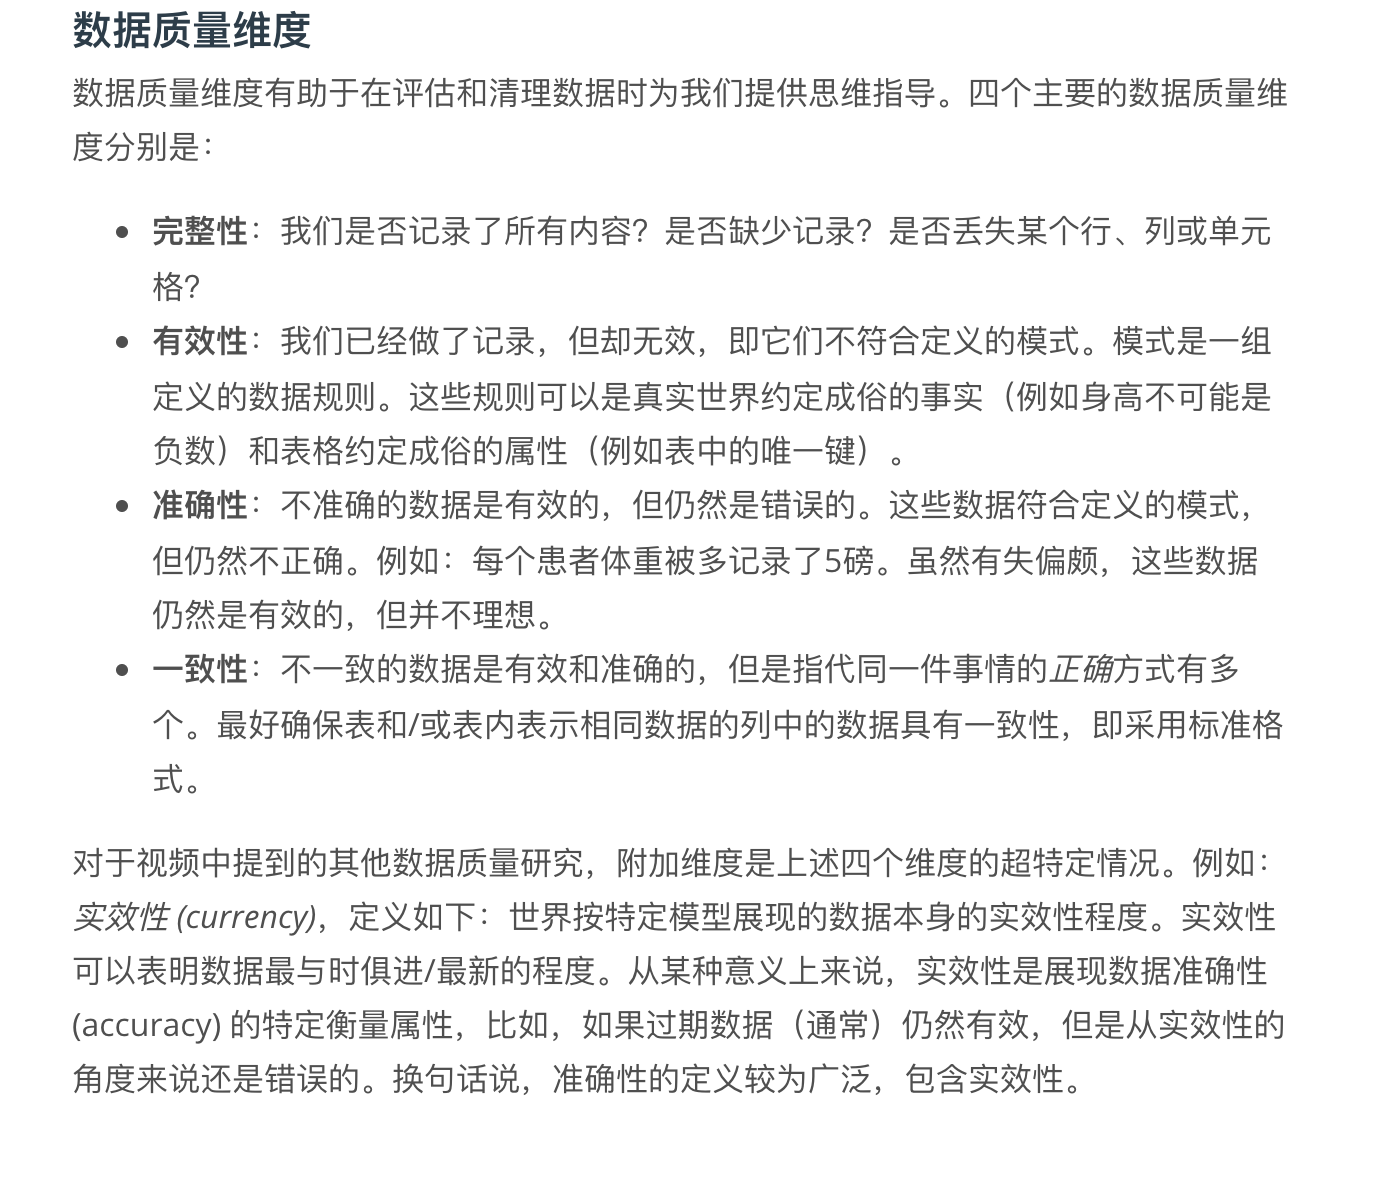

## 编程评估
以下是常用的pandas的编程评估方法：
+ .head (DataFrame 和 Series)
+ .tail (DataFrame 和 Series)
+ .sample (DataFrame 和 Series)
+ .info (仅限于 DataFrame)
+ .describe (DataFrame 和 Series)
+ .value_counts (仅限于 Series)
  各种索引和筛选数据的方法 (.loc and bracket notation with/without     boolean indexing, also .iloc)


In [10]:
treatments.sample(5)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
183,tegan,johnson,-,34u - 34u,7.79,7.43,0.36
119,liisa,seppälä,36u - 47u,-,7.87,7.51,0.36
24,isac,berg,31u - 41u,-,9.68,9.29,0.39
232,pamela,hill,-,27u - 29u,9.53,9.10,0.93
78,julia,werner,35u - 40u,-,7.58,7.24,0.34


In [13]:
patients.head(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [14]:
patients.tail(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852.0,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341.0,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110.0,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109.0,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7
502,503,male,Pat,Gersten,2778 North Avenue,Burr,Nebraska,68324.0,United States,PatrickGersten@rhyta.com402-848-4923,5/3/1954,138.2,71,19.3


In [17]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
given_name      280 non-null object
surname         280 non-null object
auralin         280 non-null object
novodra         280 non-null object
hba1c_start     280 non-null float64
hba1c_end       280 non-null float64
hba1c_change    171 non-null float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [18]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [20]:
adverse_reactions.adverse_reaction

0     injection site discomfort
1                  hypoglycemia
2                  hypoglycemia
3                         cough
4             throat irritation
5                  hypoglycemia
6                  hypoglycemia
7                  hypoglycemia
8                  hypoglycemia
9     injection site discomfort
10                     headache
11                        cough
12                 hypoglycemia
13    injection site discomfort
14                 hypoglycemia
15                       nausea
16                 hypoglycemia
17                       nausea
18                 hypoglycemia
19                     headache
20                 hypoglycemia
21    injection site discomfort
22    injection site discomfort
23                 hypoglycemia
24    injection site discomfort
25                 hypoglycemia
26            throat irritation
27                 hypoglycemia
28                 hypoglycemia
29                 hypoglycemia
30                 hypoglycemia
31      

In [26]:
adverse_reactions['adverse_reaction'].value_counts()

hypoglycemia                 19
injection site discomfort     6
headache                      3
cough                         2
throat irritation             2
nausea                        2
Name: adverse_reaction, dtype: int64

In [27]:
adverse_reactions.loc[adverse_reactions['adverse_reaction'] == 'hypoglycemia']

,given_name,surname,adverse_reaction
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
5,jasmine,sykes,hypoglycemia
6,louise,johnson,hypoglycemia
7,albinca,komavec,hypoglycemia
8,noe,aranda,hypoglycemia
12,abdul-nur,isa,hypoglycemia
14,gabriele,saenger,hypoglycemia
16,jakob,jakobsen,hypoglycemia
18,ole,petersen,hypoglycemia


In [29]:
patients.loc[patients['city'] == 'New York']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
9,10,female,Sophie,Cabrera,3303 Anmoore Road,New York,New York,10011.0,United States,SophieCabreraIbarra@teleworm.us1 718 795 9124,12/3/1930,194.7,64,33.4
35,36,female,Kamila,Pecinová,3558 Longview Avenue,New York,New York,10004.0,United States,718-501-0503KamilaPecinova@dayrep.com,12/23/1985,198.9,62,36.4
84,85,female,Nương,Vũ,465 Southern Street,New York,NY,10001.0,United States,VuCamNuong@fleckens.hu516-720-5094,2/1/1981,138.2,63,24.5
129,130,female,Rebecca,Jephcott,989 Wayback Lane,New York,NY,10004.0,United States,631-370-7406RebeccaJephcott@armyspy.com,8/1/1966,203.3,65,33.8
142,143,male,Finley,Chandler,2754 Westwood Avenue,New York,New York,10001.0,United States,516-740-5280FinleyChandler@dayrep.com,10/25/1936,150.9,70,21.6
152,153,male,Christopher,Woodward,3450 Southern Street,New York,NY,10004.0,United States,ChristopherWoodward@jourrapide.com+1 (516) 630...,9/4/1984,212.2,66,34.2
188,189,male,Søren,Sørensen,2397 Bell Street,New York,NY,10011.0,United States,SrenSrensen@superrito.com1 212 201 3108,12/31/1942,157.1,67,24.6
213,214,female,Onyemaechi,Onwughara,685 Duncan Avenue,New York,NY,10013.0,United States,917-622-9142OnyemaechiOnwughara@einrot.com,3/8/1989,131.1,69,19.4
215,216,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [30]:
len(patients.loc[patients['city'] == 'New York'])

18

In [32]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
patient_id      503 non-null int64
assigned_sex    503 non-null object
given_name      503 non-null object
surname         503 non-null object
address         491 non-null object
city            491 non-null object
state           491 non-null object
zip_code        491 non-null float64
country         491 non-null object
contact         491 non-null object
birthdate       503 non-null object
weight          503 non-null float64
height          503 non-null int64
bmi             503 non-null float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [37]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [35]:
patients[patients['address'].isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [40]:
patients.surname.value_counts()

Doe            6
Taylor         3
Jakobsen       3
Tạ             2
Tucker         2
Hueber         2
Johnson        2
Ogochukwu      2
Parker         2
Bùi            2
Batukayev      2
Grímsdóttir    2
Souza          2
Nilsen         2
Kowalczyk      2
Aranda         2
Lâm            2
Liễu           2
Lund           2
Berg           2
Cindrić        2
Dratchev       2
Silva          2
Woźniak        2
Kadyrov        2
Lương          2
Schiavone      2
Collins        2
Gersten        2
Cabrera        2
              ..
Baum           1
Mortensen      1
Nebay          1
Hill           1
Petrussen      1
Lindgren       1
Sandgreen      1
Su             1
Smith          1
Ekechukwu      1
Mai            1
Maslov         1
Hrdá           1
Wagner         1
Takenaka       1
Khoury         1
Kishiev        1
Német          1
Touma          1
Yao            1
Miles          1
Amanuel        1
Luoma          1
Afanasyeva     1
Cotton         1
Pecinová       1
Vaara          1
Eidem         

In [42]:
patients[patients.address.duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [43]:
patients.weight.sort_values()

210     48.8
459    102.1
335    102.7
74     103.2
317    106.0
171    106.5
51     107.1
270    108.1
198    108.5
48     109.1
478    109.6
141    110.2
38     111.8
438    112.0
14     112.0
235    112.2
307    112.4
191    112.6
408    113.1
49     113.3
326    114.0
338    114.1
253    117.0
321    118.4
168    118.8
1      118.8
350    119.0
207    119.2
265    120.0
341    120.3
       ...  
332    224.0
252    224.2
12     224.2
222    224.8
166    225.3
111    225.9
101    226.2
150    226.6
352    227.7
428    227.7
88     227.7
13     228.4
339    229.0
182    230.3
121    230.8
257    231.7
395    231.9
246    232.1
219    237.8
11     238.7
50     238.9
441    239.1
499    239.6
439    242.0
487    242.4
144    244.9
61     244.9
283    245.5
118    254.5
485    255.9
Name: weight, Length: 503, dtype: float64

In [48]:
weight_lbs = patients[patients.surname == 'Zaitseva'].weight * 2.20462
print(weight_lbs)
height_in = patients[patients.surname == 'Zaitseva'].height
print(height_in)
bmi_check = 703 * weight_lbs / (height_in * height_in)
bmi_check
patients[patients.surname == 'Zaitseva']

210    107.585456
Name: weight, dtype: float64
210    63
Name: height, dtype: int64


,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691.0,United States,330-202-2145CamillaZaitseva@superrito.com,11/26/1938,48.8,63,19.1


In [36]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
given_name      280 non-null object
surname         280 non-null object
auralin         280 non-null object
novodra         280 non-null object
hba1c_start     280 non-null float64
hba1c_end       280 non-null float64
hba1c_change    171 non-null float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [38]:
treatments.describe()

,hba1c_start,hba1c_end,hba1c_change
count,280.000000,280.000000,171.000000
mean,7.985929,7.589286,0.546023
std,0.568638,0.569672,0.279555
min,7.500000,7.010000,0.200000
25%,7.660000,7.270000,0.340000
50%,7.800000,7.420000,0.380000
75%,7.970000,7.570000,0.920000
max,9.950000,9.580000,0.990000


In [44]:
sum(treatments.auralin.isnull())

0

In [45]:
sum(treatments.novodra.isnull())

0

#### Tidiness
- contact column in `patients` table should be split into phone number and email
- three variables in two columns in `treatment` table(treatment, start dose and end dose)

In [33]:
adverse_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
given_name          34 non-null object
surname             34 non-null object
adverse_reaction    34 non-null object
dtypes: object(3)
memory usage: 896.0+ bytes


In [49]:
all_columns = pd.Series(list(patients) + list(treatments) + list(adverse_reactions))
all_columns[all_columns.duplicated()]


14    given_name
15       surname
21    given_name
22       surname
dtype: object

['patient_id',
 'assigned_sex',
 'given_name',
 'surname',
 'address',
 'city',
 'state',
 'zip_code',
 'country',
 'contact',
 'birthdate',
 'weight',
 'height',
 'bmi']